<a href="https://colab.research.google.com/github/bcury/Machine-Learning-Projects/blob/main/ML_classification_supervised_Underfitting_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [155]:
base = pd.read_csv('/content/births.csv')

In [156]:
base

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [157]:
base.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [158]:
base.isnull()

,year,month,day,gender,births
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
15542,False,False,True,False,False
15543,False,False,True,False,False
15544,False,False,True,False,False
15545,False,False,True,False,False


In [219]:
#VISUALIZAO DE DADOS
np.unique(base['gender'], return_counts = True)

(array(['F', 'M'], dtype=object), array([7776, 7771]))

temos 7776 F e 7771 M

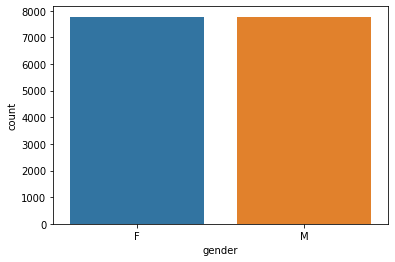

In [218]:
sns.countplot(x = base['gender']);

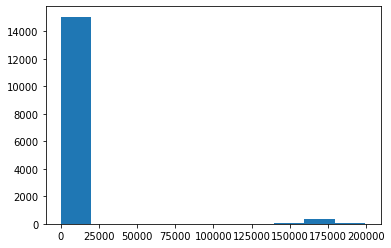

In [217]:
plt.hist(x = base['births']);

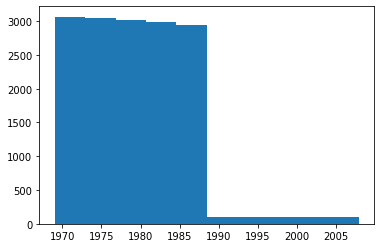

In [163]:
plt.hist(x = base['year']);

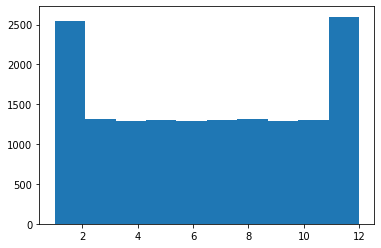

In [164]:
plt.hist(x = base['month']);

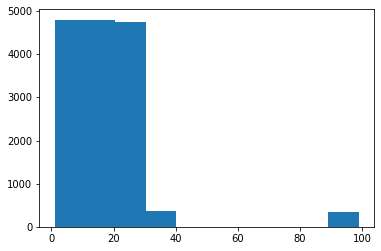

In [165]:
plt.hist(x = base['day']);

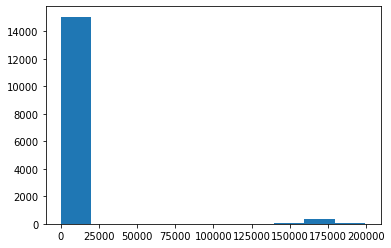

In [166]:
plt.hist(x = base['births']);

In [220]:
grafico = px.scatter_matrix(base, dimensions=['year', 'month', 'day','births'], color = 'gender')
grafico.show()

In [221]:
#TRATAMENTO DE DADOS INCONSISTENTE
base.isnull().sum()


year      0
month     0
day       0
gender    0
births    0
dtype: int64

In [222]:
base.loc[pd.isnull(base['day'])]

,year,month,day,gender,births


In [223]:
base['day'].fillna(base['day'].mean(), inplace = True)

In [224]:
base.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [225]:
base.tail()

,year,month,day,gender,births
15542,2008,10,17.769894,M,183219
15543,2008,11,17.769894,F,158939
15544,2008,11,17.769894,M,165468
15545,2008,12,17.769894,F,173215
15546,2008,12,17.769894,M,181235


maravilha, os valores faltantes já foram preenchidos com a média

In [226]:
base

,year,month,day,gender,births
0,1969,1,1.000000,F,4046
1,1969,1,1.000000,M,4440
2,1969,1,2.000000,F,4454
3,1969,1,2.000000,M,4548
4,1969,1,3.000000,F,4548
...,...,...,...,...,...
15542,2008,10,17.769894,M,183219
15543,2008,11,17.769894,F,158939
15544,2008,11,17.769894,M,165468
15545,2008,12,17.769894,F,173215


In [174]:
#DIVISAO ENTRE PEVISORES E CLASSE

In [230]:
x_base = base.iloc[:,0:3].values
y_base = base.iloc[:,3].values

In [176]:
x_base.shape

(15547, 3)

In [177]:
y_base.shape

(15547,)

In [178]:
type(x_base)

numpy.ndarray

In [179]:
type(y_base)

numpy.ndarray

#ESCALONAMENTO DOS VALORES

In [180]:
x_base[:,0].min(), x_base[:,1].min(), x_base[:,2].min()

(1969.0, 1.0, 1.0)

In [181]:
##padronalização pra deixar os valores na mesma escala, para que o algoritimo nao pense que algum atributo é mais importante do que outro

In [182]:
from sklearn.preprocessing import StandardScaler
scaler_base = StandardScaler()
x_base = scaler_dados.fit_transform(x_base)


In [183]:
x_dados[:,0].min(), x_dados[:,1].min(), x_dados[:,2].min()


(-1.491862329309954, -1.5990391487176792, -1.1145938623414755)

In [184]:
x_dados[:,0].max(), x_dados[:,1].max(), x_dados[:,2].max()

(4.304701391228621, 1.5898091895472977, 5.3988757779119085)

In [185]:
x_base

array([[-1.49186233e+00, -1.59903915e+00, -1.11459386e+00],
       [-1.49186233e+00, -1.59903915e+00, -1.11459386e+00],
       [-1.49186233e+00, -1.59903915e+00, -1.04812989e+00],
       ...,
       [ 4.30470139e+00,  1.29991389e+00,  2.36127476e-16],
       [ 4.30470139e+00,  1.58980919e+00,  2.36127476e-16],
       [ 4.30470139e+00,  1.58980919e+00,  2.36127476e-16]])

In [186]:
#TRATAMENTO DE ATRIBUTOS CATEGORICOS

#LabelEncoder  === #tranf dados categoricos strings em numericos

from sklearn.preprocessing import LabelEncoder

In [187]:
label_encoder_teste = LabelEncoder()

In [188]:
teste = label_encoder_teste.fit_transform(x_base[:,0])

In [189]:
label_encoder_year = LabelEncoder()
label_encoder_month = LabelEncoder()
label_encoder_day = LabelEncoder()


In [190]:
x_base[:,0] = label_encoder_year.fit_transform(x_base[:,0])
x_base[:,1] = label_encoder_month.fit_transform(x_base[:,1])
x_base[:,2] = label_encoder_day.fit_transform(x_base[:,2])

In [191]:
x_base[4]

array([0., 0., 2.])

In [192]:
x_base.shape

(15547, 3)

In [193]:
y_base.shape

(15547,)

In [194]:
#Treino e teste

from sklearn.model_selection import train_test_split

In [195]:
x_base_treinamento, x_base_teste, y_base_treinamento, y_base_teste = train_test_split(x_base, y_base, test_size = 0.25, random_state = 0)

In [196]:
x_base_treinamento.shape

(11660, 3)

In [197]:
y_base_treinamento

array(['F', 'F', 'F', ..., 'F', 'M', 'M'], dtype=object)

In [198]:
x_base_teste.shape

(3887, 3)

In [199]:
y_base_teste.shape

(3887,)

In [200]:
from sklearn.linear_model import LogisticRegression

In [201]:
x_base_Logistic = LogisticRegression()

In [202]:
x_base_Logistic.fit(x_base_treinamento, y_base_treinamento)

LogisticRegression()

In [203]:
previsao = x_base_Logistic.predict(x_base_teste)
previsao

array(['M', 'M', 'M', ..., 'M', 'M', 'M'], dtype=object)

In [204]:
y_base_teste

array(['M', 'M', 'M', ..., 'F', 'M', 'M'], dtype=object)

In [205]:
from sklearn.metrics import accuracy_score

In [206]:
accuracy_score(y_base_teste, previsao)

0.4962696166709545

tivemos uma acurácia de apenas 50%

Vamos tentar outro modelo

In [207]:
from sklearn.ensemble import RandomForestClassifier

In [208]:
x_base_forest = RandomForestClassifier()

In [209]:
x_base_forest.fit(x_base_treinamento, y_base_treinamento)

RandomForestClassifier()

In [211]:
previsao = x_base_forest.predict(x_base_teste)
previsao

array(['F', 'F', 'M', ..., 'M', 'F', 'F'], dtype=object)

In [212]:
y_base_teste

array(['M', 'M', 'M', ..., 'F', 'M', 'M'], dtype=object)

In [213]:
accuracy_score(y_base_teste, previsao)

0.12477489066117829

piorou muito a acurácia

Este modelo esta sofrendo de UNDERFITTING, temos que avaliar o dataset